<center><h1>Time series analysis</h1></center>
<center><h2>Tutorial 2: Forecasting</h2></center>
<br>

This tutorial we study the practical application of basic forecasting methods in Python. 

<a class="buttom" href=">#Data:-Australian-CPI-Inflation">Data: Australian CPI inflation</a> <br>
<a class="buttom" href="#Exploratory-data-analysis">Exploratory data analysis</a> <br>
<a class="buttom" href="#Random-Walk">Random Walk</a> <br>
<a class="buttom" href="#Simple-Exponential-Smoothing">Simple Exponential Smoothing</a> <br>
<a class="buttom" href="#Model-diagnostics">Model diagnostics</a> <br>
<a class="buttom" href="#Model-validation">Model validation</a> <br>
<a class="buttom" href="#Forecast">Forecast</a> <br>

Based in the work of Marcel Scharth http://www.marcelscharth.com/

This notebook relies on the following imports and settings.

In [1]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]

## Data: Datos Telefonia Movil


In [4]:
data=pd.read_csv('datasets/Telefonia_movil.csv', parse_dates=True, dayfirst=True, thousands='.')#index_col=['Año', 'Trimestre'],)# parse_dates=True, dayfirst=True)
data.head(10)

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
0,2013,1,8785943,6582117,15368060,Ene-Mar 2013
1,2013,2,9512689,7108640,16621329,Abr-Jun 2013
2,2013,3,10315484,7335154,17650638,Jul-Sept 2013
3,2013,4,9809515,6250549,16060064,Oct-Dic 2013
4,2014,1,10128751,5799223,15927974,Ene-Mar 2013
5,2014,2,10821463,6438071,17259534,Abr-Jun 2014
6,2014,3,11524344,7179152,18703495,Jul-Sept 2014
7,2014,4,11997330,7147630,19144961,Oct-Dic 2014
8,2015,1,10273637,6480172,16753809,Ene-Mar 2015
9,2015,2,11226576,6579819,17806395,Abr-Jun 2015


In [5]:
data["Periodo"] = data["Año"].map(str) + "-" + (data["Trimestre"]*3-2).map(str)
data.head(10)

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
0,2013,1,8785943,6582117,15368060,2013-1
1,2013,2,9512689,7108640,16621329,2013-4
2,2013,3,10315484,7335154,17650638,2013-7
3,2013,4,9809515,6250549,16060064,2013-10
4,2014,1,10128751,5799223,15927974,2014-1
5,2014,2,10821463,6438071,17259534,2014-4
6,2014,3,11524344,7179152,18703495,2014-7
7,2014,4,11997330,7147630,19144961,2014-10
8,2015,1,10273637,6480172,16753809,2015-1
9,2015,2,11226576,6579819,17806395,2015-4


In [6]:
data.Periodo = pd.to_datetime(data.Periodo)
data.head(10)

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
0,2013,1,8785943,6582117,15368060,2013-01-01
1,2013,2,9512689,7108640,16621329,2013-04-01
2,2013,3,10315484,7335154,17650638,2013-07-01
3,2013,4,9809515,6250549,16060064,2013-10-01
4,2014,1,10128751,5799223,15927974,2014-01-01
5,2014,2,10821463,6438071,17259534,2014-04-01
6,2014,3,11524344,7179152,18703495,2014-07-01
7,2014,4,11997330,7147630,19144961,2014-10-01
8,2015,1,10273637,6480172,16753809,2015-01-01
9,2015,2,11226576,6579819,17806395,2015-04-01


In [7]:
data.index = data.Periodo
data.head(10)

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
Periodo,,,,,,
2013-01-01,2013,1,8785943,6582117,15368060,2013-01-01
2013-04-01,2013,2,9512689,7108640,16621329,2013-04-01
2013-07-01,2013,3,10315484,7335154,17650638,2013-07-01
2013-10-01,2013,4,9809515,6250549,16060064,2013-10-01
2014-01-01,2014,1,10128751,5799223,15927974,2014-01-01
2014-04-01,2014,2,10821463,6438071,17259534,2014-04-01
2014-07-01,2014,3,11524344,7179152,18703495,2014-07-01
2014-10-01,2014,4,11997330,7147630,19144961,2014-10-01
2015-01-01,2015,1,10273637,6480172,16753809,2015-01-01


In [8]:
data.index = data.index.to_period(freq='Q') # converting the index to quarterly period instead of dates
data.head(10)

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
Periodo,,,,,,
2013Q1,2013,1,8785943,6582117,15368060,2013-01-01
2013Q2,2013,2,9512689,7108640,16621329,2013-04-01
2013Q3,2013,3,10315484,7335154,17650638,2013-07-01
2013Q4,2013,4,9809515,6250549,16060064,2013-10-01
2014Q1,2014,1,10128751,5799223,15927974,2014-01-01
2014Q2,2014,2,10821463,6438071,17259534,2014-04-01
2014Q3,2014,3,11524344,7179152,18703495,2014-07-01
2014Q4,2014,4,11997330,7147630,19144961,2014-10-01
2015Q1,2015,1,10273637,6480172,16753809,2015-01-01


For univariate time series modelling, it is better to work with a pandas series rather than dataframe. 

In [9]:
y=data['Total de minutos salientes (miles)']
y.head(10)

Periodo
2013Q1    15368060
2013Q2    16621329
2013Q3    17650638
2013Q4    16060064
2014Q1    15927974
2014Q2    17259534
2014Q3    18703495
2014Q4    19144961
2015Q1    16753809
2015Q2    17806395
Freq: Q-DEC, Name: Total de minutos salientes (miles), dtype: int64

## Exploratory data analysis

The first step in our analysis is a time series plot. We can see that both the level and volatility of inflation is much lower in recent times than it was in the 80s. There is a noticeable outlier in the third quarter of 2000 due to introduction of the GST in Australia. 

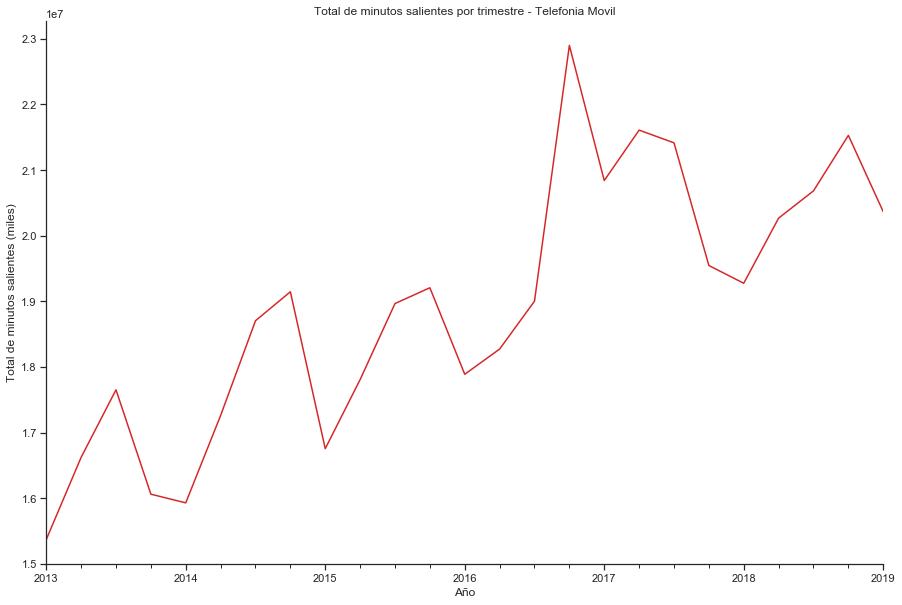

In [27]:
fig, ax= plt.subplots();#figsize=(9,6))
y.plot(color=red)
ax.set_xlabel('Año')
ax.set_ylabel('Total de minutos salientes (miles)')
ax.set_title('Total de minutos salientes por trimestre - Telefonia Movil')
sns.despine()
plt.show()

In [11]:
y.describe().round(2)

count          25.00
mean     18922204.72
std       1982378.31
min      15368060.00
25%      17650638.00
50%      19001229.00
75%      20364355.00
max      22899656.00
Name: Total de minutos salientes (miles), dtype: float64

## Random walk

In this section we use the random walk method to illustrate the process that we will follow to generate forecasts in the tutorials. 

1. Specify the forecast horizon.

2. Create a range of dates or periods starting from the time index following the last observation in the data. 

3. Generate the forecasts and store them in a series indexed by step 2. 

Below, we generate point forecasts for one to four quarters after the end of the series. 

In [14]:
h = 4
test=pd.period_range(start=y.index[-1]+1, periods=4, freq='Q')
pred=pd.Series(np.repeat(y.iloc[-1], h), index=test) # the forecast repeats the last observed values h times
pred

2019Q2    20364355
2019Q3    20364355
2019Q4    20364355
2020Q1    20364355
Freq: Q-DEC, dtype: int64

To compute interval forecasts, we first estimate the standard deviation of the errors.

In [15]:
resid=y-y.shift(1) # the shift lags the series by one period
sigma = resid.std()
round(sigma,3)

1409600.295

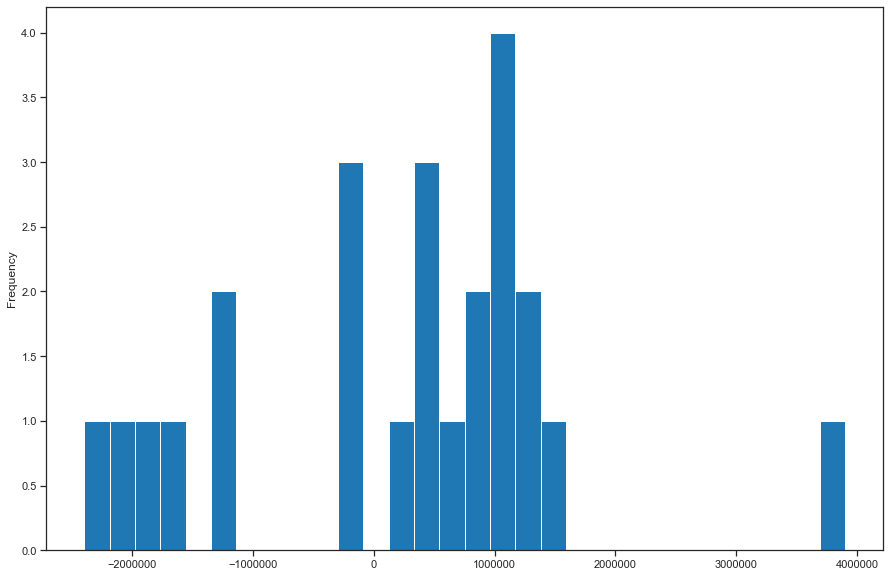

In [16]:
resid.plot.hist(bins=30);

Using the formulas from the lecture, the interval forecasts are as below. 

In [17]:
np.arange(1,h+1)

array([1, 2, 3, 4])

In [18]:
intv = pd.concat([pred-stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1)),
                   pred+stats.norm.ppf(0.975)*sigma*np.sqrt(np.arange(1,h+1))], axis=1)
intv.round(3)

,0,1
2019Q2,1.760159e+07,2.312712e+07
2019Q3,1.645721e+07,2.427150e+07
2019Q4,1.557910e+07,2.514961e+07
2020Q1,1.483882e+07,2.588989e+07


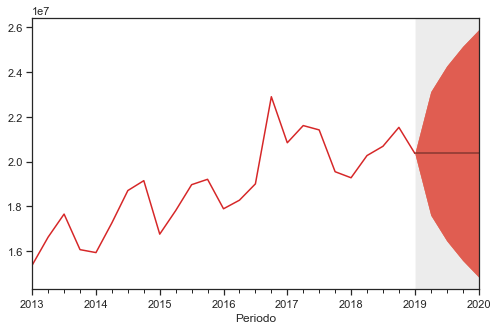

In [19]:
from plotting import fanchart

point_pred = (intv[0]+intv[1])/2

fig, ax = fanchart(y['1980':],point_pred,intv,intv,intv)

plt.show()

## Simple exponential smoothing

The exponential smoothing functions are available since version 0.9 of statsmodels in the **tsa.
holtwinters** module. Take a look in the official [docs](https://www.statsmodels.org/stable/tsa.html#exponential-smoothing). Also, they are improving them, so follow the news for the next release.

In [20]:
model_ses = sm.tsa.SimpleExpSmoothing(y).fit()
fitted_ses = model_ses.fittedvalues
model_ses.summary()

Dep. Variable:,endog,No. Observations:,25
Model:,SimpleExpSmoothing,SSE,43907864549324.172
Optimized:,True,AIC,708.856
Trend:,None,BIC,711.294
Seasonal:,None,AICC,710.856
Seasonal Periods:,None,Date:,"Sun, 15 Sep 2019"
Box-Cox:,False,Time:,20:27:37
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6030715,alpha,True
initial_level,1.5372e+07,l.0,True


Also AIC and BIC looks off so we are continue our analysis with MSE.

In [43]:
mse_ses = sm.tools.eval_measures.mse(y,fitted_ses)
print(' Predicción de la muestra:')
print(' MSE               {}'.format(mse_ses*(1e-6)))

 Predicción de la muestra:
 MSE               1756314.5819729664


Calculo de AIC y BIC

In [22]:
N = len(y)
loglik_ses=-(N/2)*(1+np.log(2*np.pi))-(N/2)*np.log(mse_ses)
aic_ses=-2*loglik_ses+2*3
bic_ses=-2*loglik_ses+np.log(N)*3
print(' Log-likelihood    %.3f' % (loglik_ses))
print(' AIC               {0:.3f}'.format(aic_ses))
print(' BIC               {0:.3f}'.format(bic_ses))

 Log-likelihood    -387.901
 AIC               781.803
 BIC               785.460


Se observa como el ajuste se comporta respecto a los datos observados

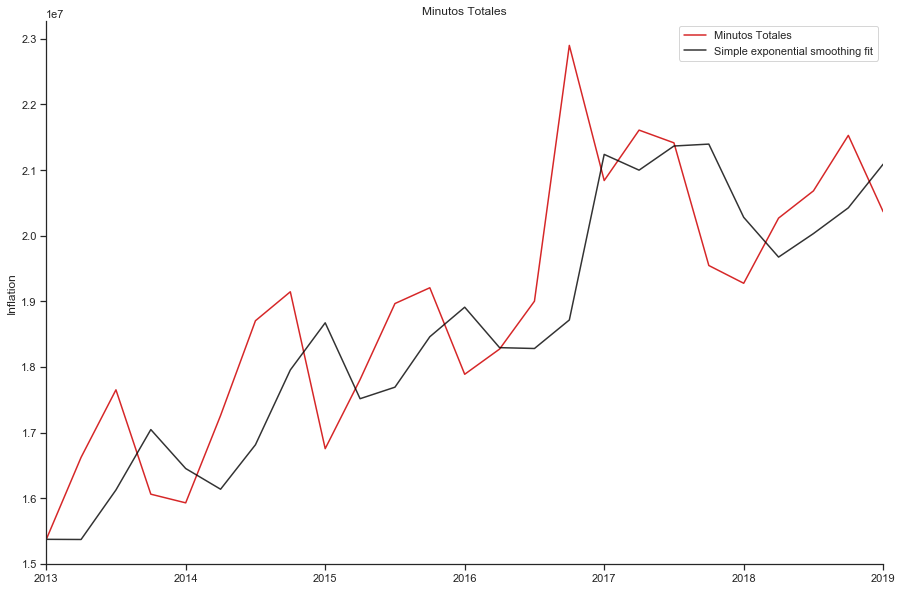

In [28]:
fig, ax= plt.subplots();#figsize=(9,6))
y.plot(color=red, label='Minutos Totales')
fitted_ses.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('Inflation')
ax.set_title('Minutos Totales')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

## Diagnóstico

Para esto estudiaremos los residuos del ajuste

In [24]:
resid=y-fitted_ses # model_ses.resid isn't a panda.Series, so no index, no plot

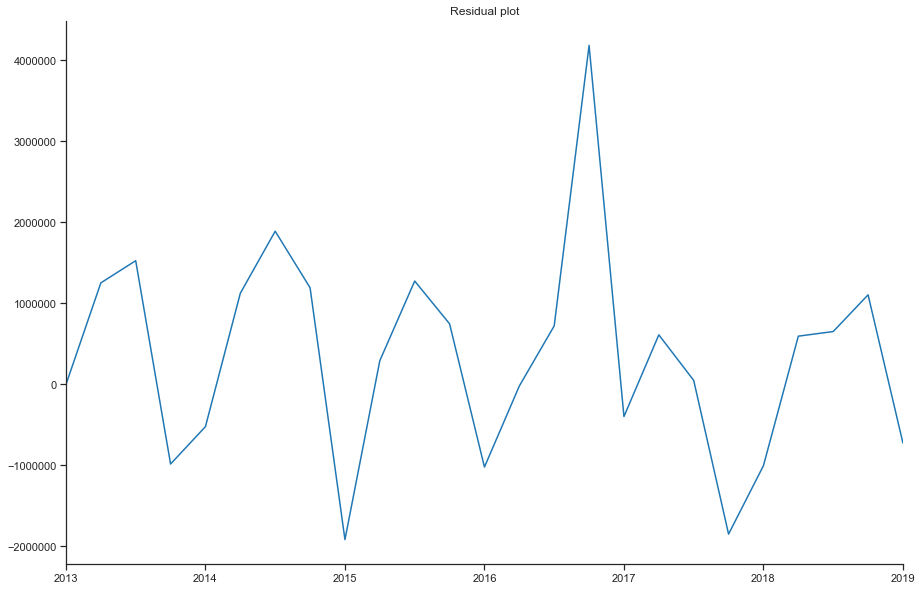

In [25]:
fig, ax= plt.subplots();#figsize=(9,6))
resid.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

Los residuos de la serie presentan un comportamiento estacional cada aproximadamente 10 años. Esto no debería observarse en los residuos, sino que se esperan valores aleatorios con media cero, formando así ruido blanco.

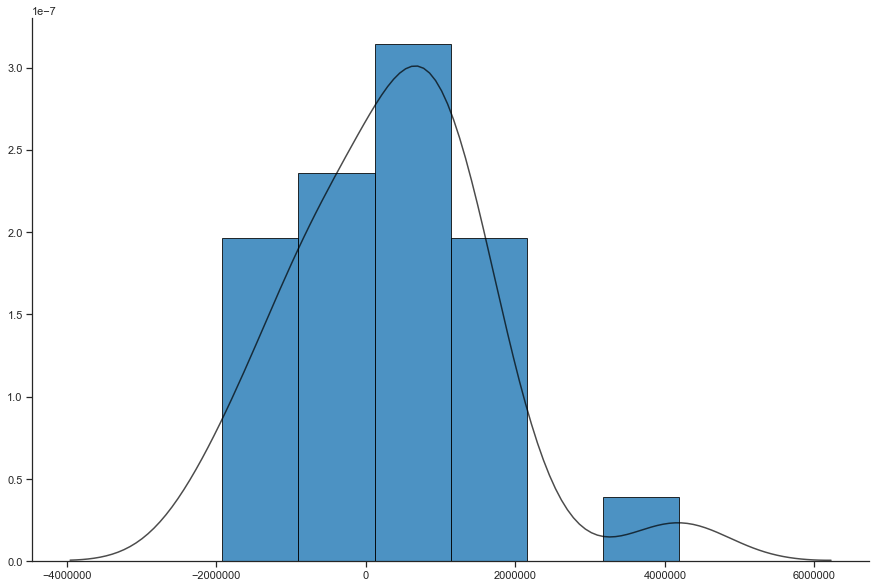

In [31]:
def hist(series):
    fig, ax= plt.subplots();#figsize=(9,6))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(resid)
plt.show()

Graficando el historama (azul) y la densidad de probabilidades empírica (negro) para los residuos comprobamos que poseen media cero aunque con gran desvío.

## Validación

Se busca comparar los métodos Random Walk y Simple Exponential Emoothing. 

In [38]:
(y.index.get_loc('2017Q1')-1)/len(y)

0.6

In [39]:
# Real time forecasting - use it as a template - expanding window

validation=y['2017Q1':].index # the validation period is Q1 2004 onwards
start = y.index.get_loc('2017Q1') # numerical index corresponding to Q1 2005

pred1 = []
pred2 = []
actual= []
for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(y.iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation)
results_sm.tail()

,RW,SES,Actual
Periodo,,,
2018Q1,19545262.0,2.038565e+07,19274565.0
2018Q2,19274565.0,1.959786e+07,20267591.0
2018Q3,20267591.0,2.003154e+07,20682782.0
2018Q4,20682782.0,2.040362e+07,21528745.0
2019Q1,21528745.0,2.114091e+07,20364355.0


Aparentemente, el modelo Random Walk genera una proyección levemente mejor a la proyección de Exponential Smoothing de acuerdo con RMSE y al SE.

In [40]:
from scipy import stats

table = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
RW,1138575.635,390031.974
SES,1162316.651,398242.592


Se confirma que el modelo Random Walk genera una proyección levemente mejor a la proyección de Exponential Smoothing de acuerdo con RMSE y al SE.

## Proyección


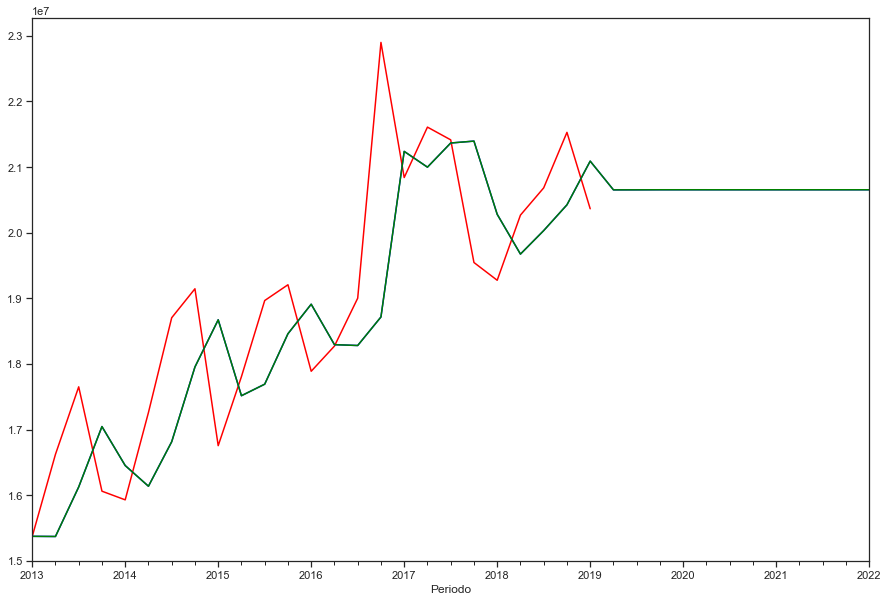

In [41]:
h=12
w=h*10
data = y
model = sm.tsa.SimpleExpSmoothing
pred_index = y.index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_exp = None
orig_roll = None
for i in range(0,h):
    current_exp = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current_exp).fit()
    pred_expanding.update(expanding.forecast(1))
    current_roll = pd.concat([data, pred_rolling.head(i)])
    rolling = model(current_roll.tail(w)).fit()
    pred_rolling.update(rolling.forecast(1))
    if i==0:
        orig_fit = expanding.fittedvalues
        orig_roll = rolling.fittedvalues
ax = data[-w:].plot(color='red');#figsize=(9,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_roll[-w:],pred_rolling]).plot(ax=ax,color='green');